<a href="https://colab.research.google.com/github/shahiryar/conflict-modelling/blob/main/Conflict_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
## Problem statement
The objective of this project is to develop a predictive model to determine the likelihood of conflicts or civil unrest in a specific region or country. By analyzing historical data and various socio-economic, political, and demographic factors, the model aims to provide early warning indicators and insights that can help policymakers and organizations proactively address potential conflicts.



In [1]:
import pandas as pd

# Loading Datasets

In [2]:
# Load Sociopolitical data

In [3]:
socio_file = '/content/drive/MyDrive/Datasets/Soci-eco data 50years.csv'
conflicts_file = '/content/drive/MyDrive/Datasets/GEDEvent_v22_1.csv'

In [4]:
df_socio = pd.read_csv(socio_file, na_values='..', )
df_cf = pd.read_csv(conflicts_file)

<ipython-input-4-30b83de55694>:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cf = pd.read_csv(conflicts_file)


In [5]:
df_socio.head()

,Time,Time Code,Country Name,Country Code,Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS],Access to electricity (% of population) [EG.ELC.ACCS.ZS],GDP per capita (current US$) [NY.GDP.PCAP.CD],Gini index [SI.POV.GINI],Multidimensional poverty headcount ratio (% of total population) [SI.POV.MDIM],Poverty headcount ratio at national poverty lines (% of population) [SI.POV.NAHC],...,Public private partnerships investment in water and sanitation (current US$) [IE.PPN.WATR.CD],"Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]","School enrollment, tertiary (% gross) [SE.TER.ENRR]",Adolescents out of school (% of lower secondary school age) [SE.SEC.UNER.LO.ZS],Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD],"Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]",Gross national expenditure (% of GDP) [NE.DAB.TOTL.ZS],Human capital index (HCI) (scale 0-1) [HD.HCI.OVRL],Political Stability and Absence of Violence/Terrorism: Estimate [PV.EST],CPIA policy and institutions for environmental sustainability rating (1=low to 6=high) [IQ.CPA.ENVR.XQ]
0,1973,YR1973,Afghanistan,AFG,NaN,NaN,149.744068,NaN,NaN,NaN,...,NaN,NaN,1.09459,NaN,NaN,1.42788,101.794875,NaN,NaN,NaN
1,1973,YR1973,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1973,YR1973,Algeria,DZA,NaN,NaN,588.906515,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,106.086094,NaN,NaN,NaN
3,1973,YR1973,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1973,YR1973,Andorra,AND,NaN,NaN,6182.925544,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_cf.head()

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,244657,IRQ-2017-1-524-322,2017,1,Clear,1,259,259,Iraq: Government,524,...,2017-07-31 00:00:00.000,0,4,0,2,6,6,6,645,NaN
1,412700,IRQ-2021-1-524-145,2021,1,Clear,1,259,259,Iraq: Government,524,...,2021-08-26 00:00:00.000,13,1,141,28,183,184,171,645,NaN
2,413023,IRQ-2021-1-524-143,2021,1,Clear,1,259,259,Iraq: Government,524,...,2021-08-28 00:00:00.000,0,2,0,0,2,3,0,645,NaN
3,412909,IRQ-2021-1-524-144,2021,1,Clear,1,259,259,Iraq: Government,524,...,2021-08-29 00:00:00.000,0,0,10,0,10,10,9,645,NaN
4,132140,AFG-1989-1-411-2,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,1989-01-13 00:00:00.000,6,0,0,0,6,6,6,700,NaN


- Cleaning Socio data

In [7]:
drop_col = ['Time Code', 'Country Code']
df_socio.drop(drop_col, axis=1, inplace=True)

In [8]:
df_socio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305 entries, 0 to 13304
Data columns (total 27 columns):
 #   Column                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                      --------------  -----  
 0   Time                                                                                                                        13302 non-null  object 
 1   Country Name                                                                                                                13300 non-null  object 
 2   Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS]                                       4994 non-null   float64
 3   Access to electricity (% of population) [EG.ELC.ACCS.ZS]                                                                 

In [9]:
feature_names = ['year', 'country', 'fuel_access', 'electricity_access', 'gdp_capita', 'gini', 'mpi', 'poverty', 'unemployment',
                 'vul_employment', 'r&d_exp', 'aid_flow', 'aid_flow_us', 'water_capita', 'morality', 'water_drinking', 'sanitation',
                 'ppp_water', 'literacy', 'enrollment', 'out_of_school', 'health_capita_exp', 'edu_exp', 'national_exp', 'hci', 'political_stab',
                 'env_sus']

dict_col_name = dict()

for k, i in zip(feature_names, df_socio.columns):
  dict_col_name[k] = i

In [10]:
df_socio.columns = feature_names
df_socio.head()

,year,country,fuel_access,electricity_access,gdp_capita,gini,mpi,poverty,unemployment,vul_employment,...,ppp_water,literacy,enrollment,out_of_school,health_capita_exp,edu_exp,national_exp,hci,political_stab,env_sus
0,1973,Afghanistan,NaN,NaN,149.744068,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.09459,NaN,NaN,1.42788,101.794875,NaN,NaN,NaN
1,1973,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1973,Algeria,NaN,NaN,588.906515,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,106.086094,NaN,NaN,NaN
3,1973,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1973,Andorra,NaN,NaN,6182.925544,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- cleaning conflict dataset

In [11]:
df_cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293634 entries, 0 to 293633
Data columns (total 49 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 293634 non-null  int64  
 1   relid              293634 non-null  object 
 2   year               293634 non-null  int64  
 3   active_year        293634 non-null  int64  
 4   code_status        293634 non-null  object 
 5   type_of_violence   293634 non-null  int64  
 6   conflict_dset_id   293634 non-null  int64  
 7   conflict_new_id    293634 non-null  int64  
 8   conflict_name      293634 non-null  object 
 9   dyad_dset_id       293634 non-null  int64  
 10  dyad_new_id        293634 non-null  int64  
 11  dyad_name          293634 non-null  object 
 12  side_a_dset_id     293634 non-null  int64  
 13  side_a_new_id      293634 non-null  int64  
 14  side_a             293634 non-null  object 
 15  side_b_dset_id     293634 non-null  int64  
 16  si

In [12]:
feature_cf = ['year', 'type_of_violence', 'best', 'country']
df_cf = df_cf[feature_cf]
df_cf.head()

,year,type_of_violence,best,country
0,2017,1,6,Afghanistan
1,2021,1,183,Afghanistan
2,2021,1,2,Afghanistan
3,2021,1,10,Afghanistan
4,1989,1,6,Afghanistan


- Merging the two datasets

In [13]:
df_socio.dropna(axis=0, subset=['year'], inplace=True)

In [14]:
df_socio = df_socio[:-2]

In [15]:
df_socio.year = df_socio.year.astype(int)

<ipython-input-15-1f30258cf439>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_socio.year = df_socio.year.astype(int)


In [16]:
df_cf.head()

,year,type_of_violence,best,country
0,2017,1,6,Afghanistan
1,2021,1,183,Afghanistan
2,2021,1,2,Afghanistan
3,2021,1,10,Afghanistan
4,1989,1,6,Afghanistan


In [17]:
#aggregate data based on year and country for df_cf before merging
df_cf = df_cf.groupby(['year', 'country']).agg({'best': 'mean'})
df_cf.reset_index(inplace=True)

In [18]:
df_cf.rename(columns = {'best': 'mean_fatalities'}, inplace=True)
df_cf.head()

,year,country,mean_fatalities
0,1989,Afghanistan,37.317241
1,1989,Angola,11.050000
2,1989,Bangladesh,4.050000
3,1989,Cambodia (Kampuchea),18.930233
4,1989,Chad,16.666667


In [19]:
df_cf['conflict_status'] = (df_cf.mean_fatalities> 0).astype(int)

In [20]:
df_cf.head()

,year,country,mean_fatalities,conflict_status
0,1989,Afghanistan,37.317241,1
1,1989,Angola,11.050000,1
2,1989,Bangladesh,4.050000,1
3,1989,Cambodia (Kampuchea),18.930233,1
4,1989,Chad,16.666667,1


In [21]:
df = df_socio.merge(df_cf, on=['year', 'country'], how='outer')
df.head()

,year,country,fuel_access,electricity_access,gdp_capita,gini,mpi,poverty,unemployment,vul_employment,...,enrollment,out_of_school,health_capita_exp,edu_exp,national_exp,hci,political_stab,env_sus,mean_fatalities,conflict_status
0,1973,Afghanistan,NaN,NaN,149.744068,NaN,NaN,NaN,NaN,NaN,...,1.09459,NaN,NaN,1.42788,101.794875,NaN,NaN,NaN,NaN,NaN
1,1973,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1973,Algeria,NaN,NaN,588.906515,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,106.086094,NaN,NaN,NaN,NaN,NaN
3,1973,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1973,Andorra,NaN,NaN,6182.925544,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Taking years above 2000

In [22]:
df = df[df.year> 2000]

In [23]:
df.head()

,year,country,fuel_access,electricity_access,gdp_capita,gini,mpi,poverty,unemployment,vul_employment,...,enrollment,out_of_school,health_capita_exp,edu_exp,national_exp,hci,political_stab,env_sus,mean_fatalities,conflict_status
7448,2001,Afghanistan,7.2,4.074574,NaN,NaN,NaN,NaN,8.040,91.65715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.114068,1.0
7449,2001,Albania,40.5,100.000000,1281.659826,NaN,NaN,NaN,18.575,59.01575,...,15.90463,6.31571,73.788681,3.4587,123.824170,NaN,NaN,NaN,NaN,NaN
7450,2001,Algeria,97.3,98.966873,1754.582838,NaN,NaN,NaN,27.300,30.93520,...,15.65381,NaN,67.338501,NaN,85.327558,NaN,NaN,NaN,8.425000,1.0
7451,2001,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7452,2001,Andorra,100.0,100.000000,22809.291868,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1336.061157,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Fill in Nan with 0 in the best_fatalities to indicate that no event took place

In [24]:
df.mean_fatalities = df.mean_fatalities.fillna(0 )

In [25]:
(df.mean_fatalities>0).sum() == (df.conflict_status==0).sum()

False

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6092 entries, 7448 to 13678
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                6092 non-null   int64  
 1   country             6092 non-null   object 
 2   fuel_access         4756 non-null   float64
 3   electricity_access  5248 non-null   float64
 4   gdp_capita          5362 non-null   float64
 5   gini                1471 non-null   float64
 6   mpi                 494 non-null    float64
 7   poverty             1017 non-null   float64
 8   unemployment        5162 non-null   float64
 9   vul_employment      4933 non-null   float64
 10  r&d_exp             1552 non-null   float64
 11  aid_flow            4047 non-null   float64
 12  aid_flow_us         3889 non-null   float64
 13  water_capita        4593 non-null   float64
 14  morality            231 non-null    float64
 15  water_drinking      5169 non-null   float64
 16  sa

## Dealing with Missing Values in DF

In [27]:
(df.mean_fatalities>0).astype(int)

7448     1
7449     0
7450     1
7451     0
7452     0
        ..
13674    1
13675    1
13676    1
13677    1
13678    1
Name: mean_fatalities, Length: 6092, dtype: int64

In [28]:
df.conflict_status = (df.mean_fatalities>0).astype(int)

In [29]:
#drop columns where 70% of data is missing
drop_thresh = int(df.shape[0]*0.70)
df.dropna(axis=1, thresh = drop_thresh).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6092 entries, 7448 to 13678
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                6092 non-null   int64  
 1   country             6092 non-null   object 
 2   fuel_access         4756 non-null   float64
 3   electricity_access  5248 non-null   float64
 4   gdp_capita          5362 non-null   float64
 5   unemployment        5162 non-null   float64
 6   vul_employment      4933 non-null   float64
 7   water_capita        4593 non-null   float64
 8   water_drinking      5169 non-null   float64
 9   health_capita_exp   4716 non-null   float64
 10  mean_fatalities     6092 non-null   float64
 11  conflict_status     6092 non-null   int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 618.7+ KB


- Using experimental Iterative Imputer to Impute values

In [30]:
def smart_imputer(df):
  from sklearn.experimental import enable_iterative_imputer
  from sklearn.impute import IterativeImputer

  imptr = IterativeImputer(random_state=1)
  imptr.fit(df)
  return imptr

In [31]:
imputer = smart_imputer(df.iloc[:, 2:])
imputer.transform(df.iloc[:, 2:])

_df_ = pd.DataFrame(data = imputer.transform(df.iloc[:, 2:]), columns=imputer.get_feature_names_out())
_df_.head()

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,fuel_access,electricity_access,gdp_capita,gini,mpi,poverty,unemployment,vul_employment,r&d_exp,aid_flow,...,enrollment,out_of_school,health_capita_exp,edu_exp,national_exp,hci,political_stab,env_sus,mean_fatalities,conflict_status
0,7.200000,4.074574,656.113366,36.878282,61.510192,51.462178,8.040000,91.657150,0.553615,3.686500e+08,...,4.873854,52.105769,474.626336,2.454255,105.367473,0.295856,-2.043600,2.620038,21.114068,1.0
1,40.500000,100.000000,1281.659826,42.494381,41.839387,29.918368,18.575000,59.015750,0.750336,2.143500e+08,...,15.904630,6.315710,73.788681,3.458700,123.824170,0.487432,-0.242531,2.957397,0.000000,0.0
2,97.300000,98.966873,1754.582838,45.995617,32.730963,33.362231,27.300000,30.935200,0.230280,1.612500e+08,...,15.653810,13.240112,67.338501,3.219357,85.327558,0.433908,-1.149224,3.249532,8.425000,1.0
3,74.849053,92.703864,15508.605715,35.495394,29.072020,21.255801,7.054602,32.604588,0.986241,4.796477e+09,...,40.108882,9.719891,1091.328325,4.625773,105.318276,0.616932,0.370804,3.396362,0.000000,0.0
4,100.000000,100.000000,22809.291868,35.527821,24.477854,17.691678,6.181161,16.910422,0.986557,4.796478e+09,...,47.884025,5.752820,1336.061157,4.628235,95.854956,0.657926,0.542535,3.510093,0.000000,0.0


In [32]:
_df_['year'] = df['year'].values
_df_['country'] = df['country'].values
df = _df_.copy()
df.head()

,fuel_access,electricity_access,gdp_capita,gini,mpi,poverty,unemployment,vul_employment,r&d_exp,aid_flow,...,health_capita_exp,edu_exp,national_exp,hci,political_stab,env_sus,mean_fatalities,conflict_status,year,country
0,7.200000,4.074574,656.113366,36.878282,61.510192,51.462178,8.040000,91.657150,0.553615,3.686500e+08,...,474.626336,2.454255,105.367473,0.295856,-2.043600,2.620038,21.114068,1.0,2001,Afghanistan
1,40.500000,100.000000,1281.659826,42.494381,41.839387,29.918368,18.575000,59.015750,0.750336,2.143500e+08,...,73.788681,3.458700,123.824170,0.487432,-0.242531,2.957397,0.000000,0.0,2001,Albania
2,97.300000,98.966873,1754.582838,45.995617,32.730963,33.362231,27.300000,30.935200,0.230280,1.612500e+08,...,67.338501,3.219357,85.327558,0.433908,-1.149224,3.249532,8.425000,1.0,2001,Algeria
3,74.849053,92.703864,15508.605715,35.495394,29.072020,21.255801,7.054602,32.604588,0.986241,4.796477e+09,...,1091.328325,4.625773,105.318276,0.616932,0.370804,3.396362,0.000000,0.0,2001,American Samoa
4,100.000000,100.000000,22809.291868,35.527821,24.477854,17.691678,6.181161,16.910422,0.986557,4.796478e+09,...,1336.061157,4.628235,95.854956,0.657926,0.542535,3.510093,0.000000,0.0,2001,Andorra


In [33]:
columns = ['year', 'country' ,'fuel_access', 'electricity_access', 'gdp_capita', 'gini', 'mpi',
       'poverty', 'unemployment', 'vul_employment', 'r&d_exp', 'aid_flow',
       'aid_flow_us', 'water_capita', 'morality', 'water_drinking',
       'sanitation', 'ppp_water', 'literacy', 'enrollment',
       'out_of_school', 'health_capita_exp', 'edu_exp', 'national_exp',
       'hci', 'political_stab', 'env_sus', 'conflict_status']
df = df[columns]

In [34]:
df.head()

,year,country,fuel_access,electricity_access,gdp_capita,gini,mpi,poverty,unemployment,vul_employment,...,literacy,enrollment,out_of_school,health_capita_exp,edu_exp,national_exp,hci,political_stab,env_sus,conflict_status
0,2001,Afghanistan,7.200000,4.074574,656.113366,36.878282,61.510192,51.462178,8.040000,91.657150,...,45.506612,4.873854,52.105769,474.626336,2.454255,105.367473,0.295856,-2.043600,2.620038,1.0
1,2001,Albania,40.500000,100.000000,1281.659826,42.494381,41.839387,29.918368,18.575000,59.015750,...,98.712982,15.904630,6.315710,73.788681,3.458700,123.824170,0.487432,-0.242531,2.957397,0.0
2,2001,Algeria,97.300000,98.966873,1754.582838,45.995617,32.730963,33.362231,27.300000,30.935200,...,80.084638,15.653810,13.240112,67.338501,3.219357,85.327558,0.433908,-1.149224,3.249532,1.0
3,2001,American Samoa,74.849053,92.703864,15508.605715,35.495394,29.072020,21.255801,7.054602,32.604588,...,88.255146,40.108882,9.719891,1091.328325,4.625773,105.318276,0.616932,0.370804,3.396362,0.0
4,2001,Andorra,100.000000,100.000000,22809.291868,35.527821,24.477854,17.691678,6.181161,16.910422,...,92.241511,47.884025,5.752820,1336.061157,4.628235,95.854956,0.657926,0.542535,3.510093,0.0


- onehotencoding of countries

In [35]:
#OneHotEncoding

encoded_country = pd.get_dummies(df['country'], prefix='country').iloc[:, :-1]
df.drop('country', axis=1, inplace=True)
df = df.join(encoded_country)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Columns: 313 entries, year to country_Zimbabwe
dtypes: float64(26), int64(1), uint8(286)
memory usage: 2.9 MB


In [37]:
df.head()

,year,fuel_access,electricity_access,gdp_capita,gini,mpi,poverty,unemployment,vul_employment,r&d_exp,...,country_Venezuela,"country_Venezuela, RB",country_Vietnam,country_Virgin Islands (U.S.),country_West Bank and Gaza,country_World,country_Yemen (North Yemen),"country_Yemen, Rep.",country_Zambia,country_Zimbabwe
0,2001,7.200000,4.074574,656.113366,36.878282,61.510192,51.462178,8.040000,91.657150,0.553615,...,0,0,0,0,0,0,0,0,0,0
1,2001,40.500000,100.000000,1281.659826,42.494381,41.839387,29.918368,18.575000,59.015750,0.750336,...,0,0,0,0,0,0,0,0,0,0
2,2001,97.300000,98.966873,1754.582838,45.995617,32.730963,33.362231,27.300000,30.935200,0.230280,...,0,0,0,0,0,0,0,0,0,0
3,2001,74.849053,92.703864,15508.605715,35.495394,29.072020,21.255801,7.054602,32.604588,0.986241,...,0,0,0,0,0,0,0,0,0,0
4,2001,100.000000,100.000000,22809.291868,35.527821,24.477854,17.691678,6.181161,16.910422,0.986557,...,0,0,0,0,0,0,0,0,0,0


# Modelling

In [38]:
y = df.pop('conflict_status')
X = df

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
#base RandomForestClassifier Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
y_pred = rf.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)

sns.heatmap(cm)

<Axes: >

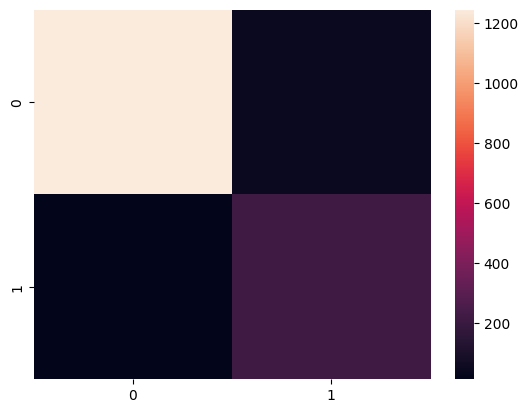

In [43]:
import seaborn as sns

sns.heatmap(cm)

In [44]:
cm

array([[1246,   49],
       [  11,  217]])

In [45]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

print("For Base Random Forest Classification model")
print("Accuracy score: ",accuracy_score(y_test, y_pred))
print("Recall : ",recall_score(y_test, y_pred))
print("f1 score : ", f1_score(y_test, y_pred))


For Base Random Forest Classification model
Accuracy score:  0.9606040709126723
Recall :  0.8157894736842105
f1 score :  0.8785425101214575


### Hyperparameter Tuning: Grid Search

In [46]:
# parameter tuning
#random_forest_parameter_grid = {
#    'criterion' : ["gini", "entropy", "log_loss"],
#    'n_estimators': [100, 200, 400, 500],
#    'max_depth': [None, 1, 5, 10, 15],
#    'min_samples_split':[2, 5, 10, 15 ],
#    'min_samples_leaf':[1, 2, 4, 7],
#    'max_features':["sqrt", "log2", None]
#}


# parameter tuning
random_forest_parameter_grid = {
    'n_estimators': [100, 200, 400, 500],
    'max_depth': [None, 1, 5, 10],
}

In [ ]:
#tuning RandomForestClassifier Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

random_forest_estimator = RandomForestClassifier()

grid_searcher = GridSearchCV(scoring=recall_score , estimator=random_forest_estimator, param_grid=random_forest_parameter_grid, n_jobs=64)
grid_searcher.fit(X_train, y_train)

print("Best params : ", grid_searcher.best_params_)
random_forest_best_model = grid_searcher.best_estimator_

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_best_pred = random_forest_best_model.predict(X_test)
confusion_matrix_best_pred = confusion_matrix(y_best_pred, y_test)

sns.heatmap(confusion_matrix_best_pred)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

print("For Base Random Forest Classification model")
print("Accuracy score: ",accuracy_score(y_test, y_best_pred))
print("Recall : ",recall_score(y_test, y_best_pred))
print("f1 score : ", f1_score(y_test, y_best_pred))

# Deep Learning

In [48]:
X_train.shape

(4569, 312)

In [49]:
import tensorflow as tf
from tensorflow.keras.layers import Dense as Dense_layer
from tensorflow.keras.models import Sequential

In [54]:
deep_model = Sequential()
deep_model.add(tf.keras.Input(shape=(X_train.shape[1],)))
deep_model.add(Dense_layer(700, activation='relu') )
deep_model.add(Dense_layer(500, activation='sigmoid'))
deep_model.add(Dense_layer(300, activation='relu') )
deep_model.add(Dense_layer(200, activation='sigmoid'))
deep_model.add(Dense_layer(1, activation='sigmoid'))

In [55]:
deep_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 700)               219100    
                                                                 
 dense_4 (Dense)             (None, 500)               350500    
                                                                 
 dense_5 (Dense)             (None, 300)               150300    
                                                                 
 dense_6 (Dense)             (None, 200)               60200     
                                                                 
 dense_7 (Dense)             (None, 1)                 201       
                                                                 
Total params: 780,301
Trainable params: 780,301
Non-trainable params: 0
_________________________________________________________________


In [56]:
deep_model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
history = deep_model.fit(X_train, y_train.values.reshape(-1,1), batch_size=80, epochs=500)

<Axes: >

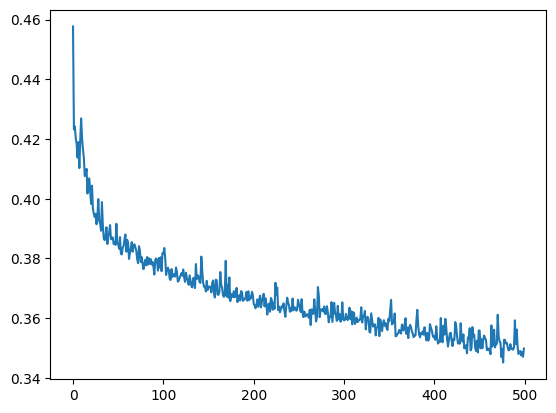

In [60]:
sns.lineplot(history.history['loss'])

In [61]:
# Evaluate the deep_model on the test data using `evaluate`
print("Evaluate on test data")
results = deep_model.evaluate(X_test, y_test.values.reshape(-1,1), batch_size=128)
print("test loss, test acc:", results)
 
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = deep_model.predict(X_test)
print("predictions shape:", predictions.shape)

Evaluate on test data
12/12 [==============================] - 0s 8ms/step - loss: 0.4358 - accuracy: 0.8273
test loss, test acc: [0.4358232319355011, 0.8273144960403442]
Generate predictions for 3 samples
48/48 [==============================] - 0s 4ms/step
predictions shape: (1523, 1)


In [62]:
y_deep_pred = []
for actual, pred in zip(y_test, predictions):
  y_deep_pred.append(pred[0]>0.3)

<Axes: >

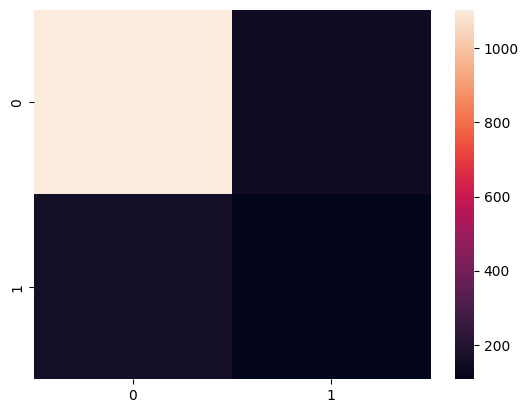

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix_best_pred = confusion_matrix(y_test, y_deep_pred)

sns.heatmap(confusion_matrix_best_pred)

In [64]:
confusion_matrix_best_pred

array([[1104,  153],
       [ 159,  107]])

- Changing the distribution of dataset to equally distribute the two classes

In [67]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Assuming X_train and y_train are your input data and labels, respectively

# Instantiate SMOTE
smote = SMOTE()

# Apply SMOTE to generate synthetic samples
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the class distribution before and after applying SMOTE
print("Before SMOTE:")
print(np.bincount(y_train))  # Count the occurrences of each class
print("\nAfter SMOTE:")
print(np.bincount(y_train_resampled))

# Now, X_train_resampled and y_train_resampled contain the resampled data


Before SMOTE:
[3762  807]

After SMOTE:
[3762 3762]


In [ ]:
history = deep_model.fit(X_train, y_train.values.reshape(-1,1), batch_size=80, epochs=500)

<Axes: >

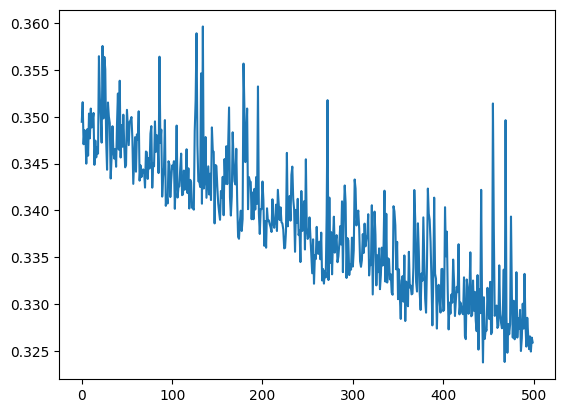

In [69]:
sns.lineplot(history.history['loss'])

In [70]:
# Evaluate the deep_model on the test data using `evaluate`
print("Evaluate on test data")
results = deep_model.evaluate(X_test, y_test.values.reshape(-1,1), batch_size=128)
print("test loss, test acc:", results)
 
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = deep_model.predict(X_test)
print("predictions shape:", predictions.shape)

Evaluate on test data
12/12 [==============================] - 0s 15ms/step - loss: 0.5140 - accuracy: 0.8089
test loss, test acc: [0.5140172243118286, 0.8089297413825989]
Generate predictions for 3 samples
48/48 [==============================] - 0s 8ms/step
predictions shape: (1523, 1)


<Axes: >

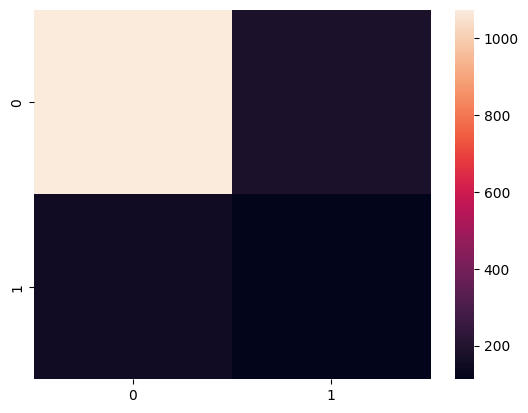

In [72]:
y_deep_pred = []
for actual, pred in zip(y_test, predictions):
  y_deep_pred.append(pred[0]>0.3)

from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix_best_pred = confusion_matrix(y_test, y_deep_pred)

sns.heatmap(confusion_matrix_best_pred)

- training a seperate model

In [73]:
deep_model = Sequential()
deep_model.add(tf.keras.Input(shape=(X_train.shape[1],)))
deep_model.add(Dense_layer(700, activation='relu') )
deep_model.add(Dense_layer(500, activation='sigmoid'))
deep_model.add(Dense_layer(300, activation='relu') )
deep_model.add(Dense_layer(200, activation='sigmoid'))
deep_model.add(Dense_layer(1, activation='sigmoid'))

deep_model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

history = deep_model.fit(X_train_resampled, y_train_resampled.values.reshape(-1,1), batch_size=80, epochs=100)

Epoch 1/100
95/95 [==============================] - 8s 37ms/step - loss: 0.6283 - accuracy: 0.6435
Epoch 2/100
95/95 [==============================] - 3s 31ms/step - loss: 0.5970 - accuracy: 0.6692
Epoch 3/100
95/95 [==============================] - 2s 18ms/step - loss: 0.5896 - accuracy: 0.6734
Epoch 4/100
95/95 [==============================] - 2s 19ms/step - loss: 0.6044 - accuracy: 0.6595
Epoch 5/100
95/95 [==============================] - 2s 18ms/step - loss: 0.6213 - accuracy: 0.6489
Epoch 6/100
95/95 [==============================] - 2s 24ms/step - loss: 0.6115 - accuracy: 0.6575
Epoch 7/100
95/95 [==============================] - 3s 29ms/step - loss: 0.6124 - accuracy: 0.6579
Epoch 8/100
95/95 [==============================] - 3s 30ms/step - loss: 0.6033 - accuracy: 0.6685
Epoch 9/100
95/95 [==============================] - 2s 18ms/step - loss: 0.5993 - accuracy: 0.6668
Epoch 10/100
95/95 [==============================] - 2s 18ms/step - loss: 0.5944 - accuracy: 0.6671

<Axes: >

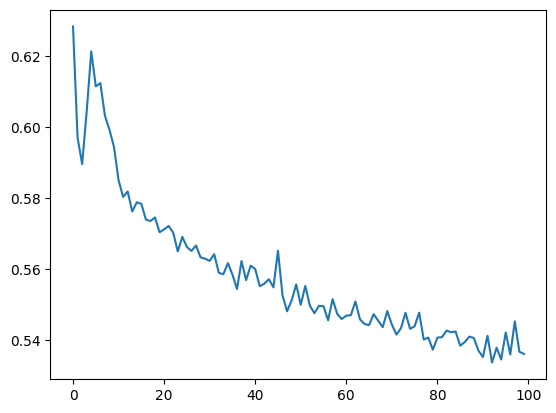

In [74]:
sns.lineplot(history.history['loss'])

<Axes: >

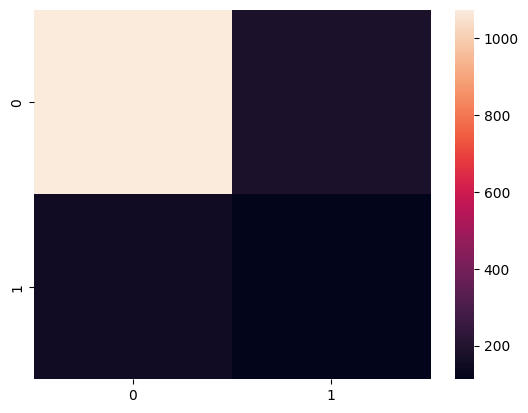

In [75]:
y_deep_pred = []
for actual, pred in zip(y_test, predictions):
  y_deep_pred.append(pred[0]>0.3)

from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix_best_pred = confusion_matrix(y_test, y_deep_pred)

sns.heatmap(confusion_matrix_best_pred)

- SMOTE does not work well
- trying undersamplying

In [78]:
import numpy as np
from sklearn.utils import resample

# Assuming X_train and y_train are your input data and labels, respectively

# Concatenate X_train and y_train
data = np.column_stack((X_train, y_train))

# Separate majority and minority class
majority_class = data[data[:, -1] == 0]
minority_class = data[data[:, -1] == 1]

# Downsample the majority class
downsampled_majority = resample(majority_class,
                                replace=False,  # No replacement to avoid duplicates
                                n_samples=len(minority_class),  # Same number of samples as the minority class
                                random_state=42)

# Combine the downsampled majority class with the minority class
undersampled_data = np.concatenate((downsampled_majority, minority_class))

# Separate features (X) and labels (y)
X_train_resampled = undersampled_data[:, :-1]
y_train_resampled = undersampled_data[:, -1]

# Print the class distribution before and after random undersampling
print("Before random undersampling:")
print(np.bincount(y_train))  # Count the occurrences of each class
print("\nAfter random undersampling:")
print(np.bincount(y_train_resampled.astype(int)))

# Now, X_train_resampled and y_train_resampled contain the undersampled data


Before random undersampling:
[3762  807]

After random undersampling:
[807 807]


- Trying Random Forest Classifier

In [79]:
#base RandomForestClassifier Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

- Under Samplying Test Datasets

In [84]:
# Concatenate X_test and y_test
data = np.column_stack((X_test, y_test))

# Separate majority and minority class
majority_class = data[data[:, -1] == 0]
minority_class = data[data[:, -1] == 1]

# Downsample the majority class
downsampled_majority = resample(majority_class,
                                replace=False,  # No replacement to avoid duplicates
                                n_samples=len(minority_class),  # Same number of samples as the minority class
                                random_state=42)

# Combine the downsampled majority class with the minority class
undersampled_data = np.concatenate((downsampled_majority, minority_class))

# Separate features (X) and labels (y)
X_test_resampled = undersampled_data[:, :-1]
y_test_resampled = undersampled_data[:, -1]

# Print the class distribution before and after random undersampling
print("Before random undersampling:")
print(np.bincount(y_test))  # Count the occurrences of each class
print("\nAfter random undersampling:")
print(np.bincount(y_test_resampled.astype(int)))

# Now, X_test_resampled and y_test_resampled contain the undersampled data


Before random undersampling:
[1257  266]

After random undersampling:
[266 266]


<Axes: >

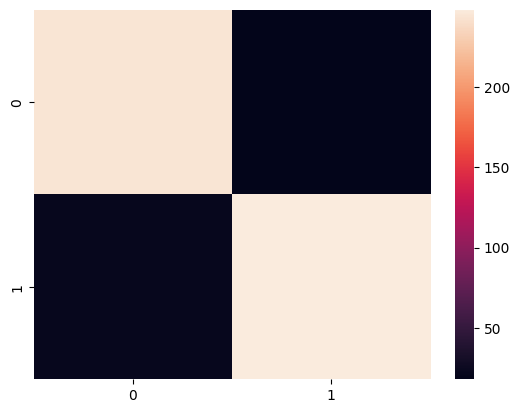

In [85]:
y_pred_from_resampled = rf.predict(X_test_resampled)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_from_resampled, y_test_resampled)

sns.heatmap(cm)

In [87]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

print("For Base Random Forest Classification model")
print("Accuracy score: ",accuracy_score(y_pred_from_resampled, y_test_resampled))
print("Recall : ",recall_score(y_pred_from_resampled, y_test_resampled))
print("f1 score : ", f1_score(y_pred_from_resampled, y_test_resampled))

For Base Random Forest Classification model
Accuracy score:  0.924812030075188
Recall :  0.9185185185185185
f1 score :  0.9253731343283582


- Through undersamplying the recall score has improved by about 10%!
- f1 Score has improved by 5%
- The cost of increasing the recall and f1 score is a decrease of about 3% accuracy